In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR

In [2]:
flights_df = pd.read_csv('complete_flight_info_and weather_data.csv')

# convert flight date to date object
flights_df['FL_DATE'] = pd.to_datetime(flights_df['FL_DATE'])

# converts string TRUE/FALSE to boolean
flights_df.replace({'TRUE': True, 'FALSE': False}, inplace=True)

# convert FL_Date to year, month, day
flights_df['FL_YEAR'] = pd.to_datetime(flights_df['FL_DATE']).dt.year
flights_df['FL_MONTH'] = pd.to_datetime(flights_df['FL_DATE']).dt.month
flights_df['FL_DAY'] = pd.to_datetime(flights_df['FL_DATE']).dt.day

# drop original date time
flights_df.drop(columns=['FL_DATE'], inplace=True)

X = flights_df.loc[:, flights_df.columns != 'ARR_DELAY']
y = flights_df['ARR_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 56, shuffle=True)

MSE: 16429.523013610826
MAE: 60.51655612221129
R2: -144.47585380201815


(0.0, 200.0)

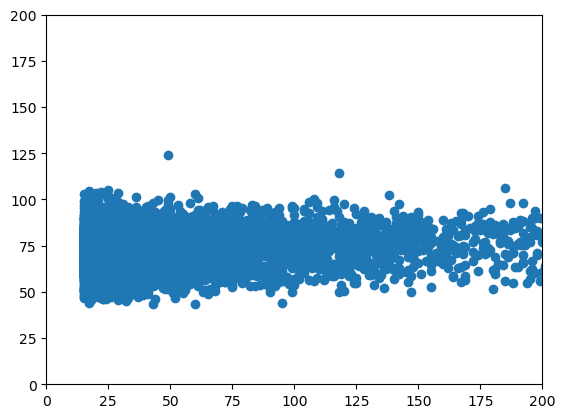

In [3]:
model_la = Lasso(alpha=2)

model_la.fit(X_train, y_train)

la_predict = model_la.predict(X_test)

print('MSE: ' + str(mean_squared_error(la_predict, y_test)))
print('MAE: ' + str(mean_absolute_error(la_predict, y_test)))
print('R2: ' + str(r2_score(la_predict, y_test)))

plt.scatter(y_test, la_predict)
plt.xlim([0, 200])
plt.ylim([0, 200])

MSE: 3.252073313084847e+18
MAE: 61779227.804314956
R2: -0.0009808923441854134


(0.0, 200.0)

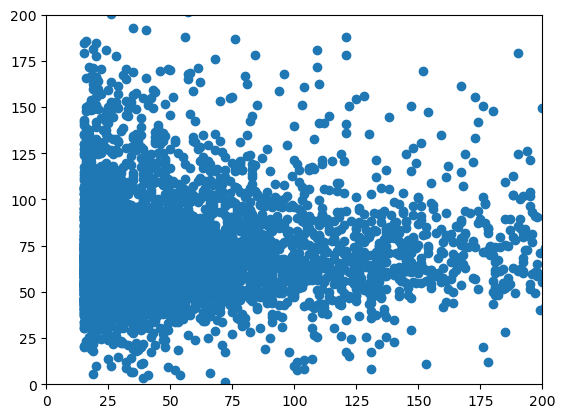

In [4]:
lm = LinearRegression()
lm.fit(X_train, y_train)

lm_predict = lm.predict(X_test)
print('MSE: ' + str(mean_squared_error(lm_predict, y_test)))
print('MAE: ' + str(mean_absolute_error(lm_predict, y_test)))
print('R2: ' + str(r2_score(lm_predict, y_test)))

plt.scatter(y_test, lm_predict)
plt.xlim([0, 200])
plt.ylim([0, 200])

In [5]:
svr_rbf = SVR(kernel='rbf')

svr_rbf.fit(X_train, y_train)

svr_predict = svr_rbf.predict(X_test)

print('MSE: ' + str(mean_squared_error(svr_predict, y_test)))
print('MAE: ' + str(mean_absolute_error(svr_predict, y_test)))
print('R2: ' + str(r2_score(svr_predict, y_test)))

MSE: 17774.18841450157
MAE: 50.321571571718486
R2: -4710.736450874039


In [ ]:
print("hello world")